In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.preprocessing

# Acquire

In [2]:
df = pd.read_csv('client_leads_with_outcomes.csv')

In [3]:
df

,token,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors
0,1,C,50,0,0,74,962,10,2
1,2,C,50,0,0,47,617,9,3
2,3,A,75,0,0,7,94,14,1
3,4,C,75,0,0,29,104,15,1
4,5,D,75,0,0,27,82,9,1
...,...,...,...,...,...,...,...,...,...
555,556,A,100,1,1,136,1001,8,1
556,557,C,75,0,0,37,14,1,1
557,558,A,100,0,0,54,33,11,0
558,559,B,25,0,0,1,1352,6,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   token          560 non-null    int64 
 1   provider       560 non-null    object
 2   lead_cost      560 non-null    int64 
 3   contact        560 non-null    int64 
 4   purchase       560 non-null    int64 
 5   lead_age       560 non-null    int64 
 6   lead_duration  560 non-null    int64 
 7   field_count    560 non-null    int64 
 8   competitors    560 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 39.5+ KB


## Info provided by CIC
- token
    - cant be used in a ML
- provided
    - can be used in an ML
- lead_cost
    - can be used in an ML
- contact
    - cant be used in an ML
- purchase
    - cant be used in an ML
    
## Info Jornaya provides
All of the following information can be used to create an ML model
- lead_age
- lead_duration
- field_count
- copetitors

In [5]:
df.isnull().sum()

token            0
provider         0
lead_cost        0
contact          0
purchase         0
lead_age         0
lead_duration    0
field_count      0
competitors      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   token          560 non-null    int64 
 1   provider       560 non-null    object
 2   lead_cost      560 non-null    int64 
 3   contact        560 non-null    int64 
 4   purchase       560 non-null    int64 
 5   lead_age       560 non-null    int64 
 6   lead_duration  560 non-null    int64 
 7   field_count    560 non-null    int64 
 8   competitors    560 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 39.5+ KB


### Takeaways:
- There are no null values
- Only one object and that is the provider, everyting else are integers
___

In [7]:
df.describe()

,token,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,280.500000,53.973214,0.164286,0.051786,31.996429,826.182143,11.869643,0.562500
std,161.802349,24.772113,0.370866,0.221792,40.007423,861.699817,6.732492,0.856223
min,1.000000,25.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,140.750000,25.000000,0.000000,0.000000,3.000000,112.750000,6.000000,0.000000
50%,280.500000,50.000000,0.000000,0.000000,27.000000,681.000000,12.000000,0.000000
75%,420.250000,75.000000,0.000000,0.000000,50.000000,956.250000,18.000000,1.000000
max,560.000000,100.000000,1.000000,1.000000,466.000000,3409.000000,23.000000,3.000000


## Take a look at each feature

### provider

In [8]:
df.provider.value_counts()

C    233
B    123
D    112
A     92
Name: provider, dtype: int64

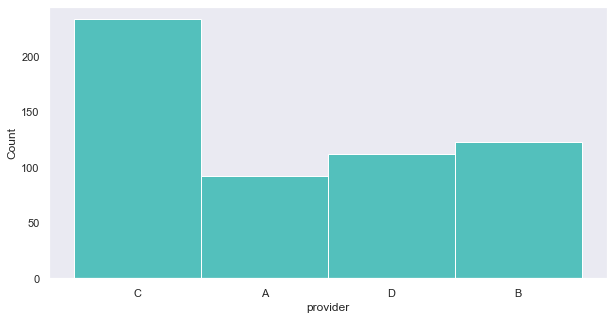

In [9]:
plt.figure(figsize=(10,5))
sns.set(style="dark")
sns.histplot(df['provider'], color='lightseagreen')
plt.show()

### Takeaways:
- Provider C provides most of the leads for CIC
- How expensive is provider C in comparison to the other providers?
- Just because provider C provids the most does not mean that their outcomes are primarily positive.
    - Look into this.
___

### lead_cost

In [10]:
df.lead_cost.value_counts()

50     213
25     165
75     110
100     72
Name: lead_cost, dtype: int64

In [11]:
df.lead_cost.mean()

53.973214285714285

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


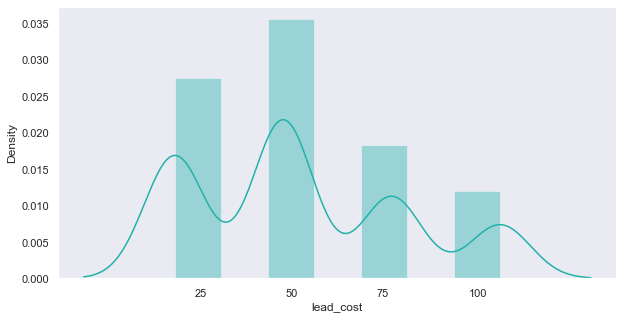

In [12]:
plt.figure(figsize=(10,5))
sns.set(style="dark")
sns.distplot(df['lead_cost'], color='lightseagreen')
plt.xticks([31, 52, 73, 95], ['25', '50', '75', '100'])
plt.show()

### Takeaways:
- Most of the lead costs are 50 followed by 25
- The average cost of a lead is $53.97
- Very few leads are more than 50 dollars
    - Is this because they are better leads or are they mostly a certain competitor?
___

### contact

In [13]:
df.contact.value_counts()

0    468
1     92
Name: contact, dtype: int64

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


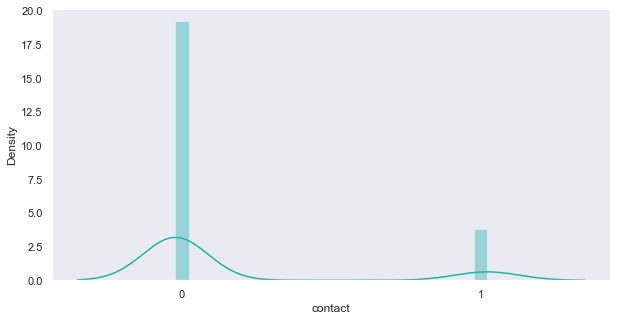

In [14]:
plt.figure(figsize=(10,5))
sns.set(style="dark")
sns.distplot(df['contact'], color='lightseagreen')
plt.xticks([0.021, 0.98], ['0', '1'])
plt.show()

### Takeaways:
- Far more leads are not able to be contacted
___

### purchase

In [15]:
df.purchase.value_counts()

0    531
1     29
Name: purchase, dtype: int64

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


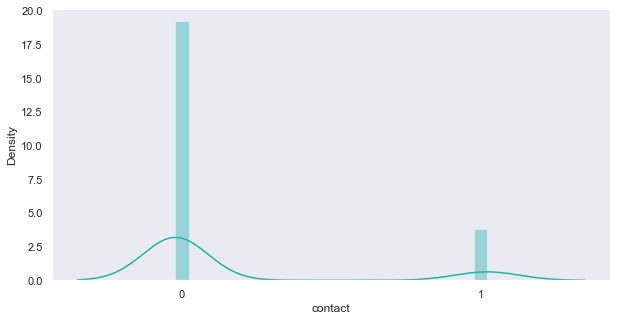

In [16]:
plt.figure(figsize=(10,5))
sns.set(style="dark")
sns.distplot(df['contact'], color='lightseagreen')
plt.xticks([0.021, 0.98], ['0', '1'])
plt.show()

### Takeaways:
- only 5.18% of leads end up purchasing with CIC
___

### lead_age

In [17]:
df.lead_age.value_counts()

1      129
31      11
29      11
76      11
49      10
      ... 
122      1
136      1
245      1
364      1
466      1
Name: lead_age, Length: 86, dtype: int64

In [18]:
df.lead_age.mean()

31.99642857142857

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


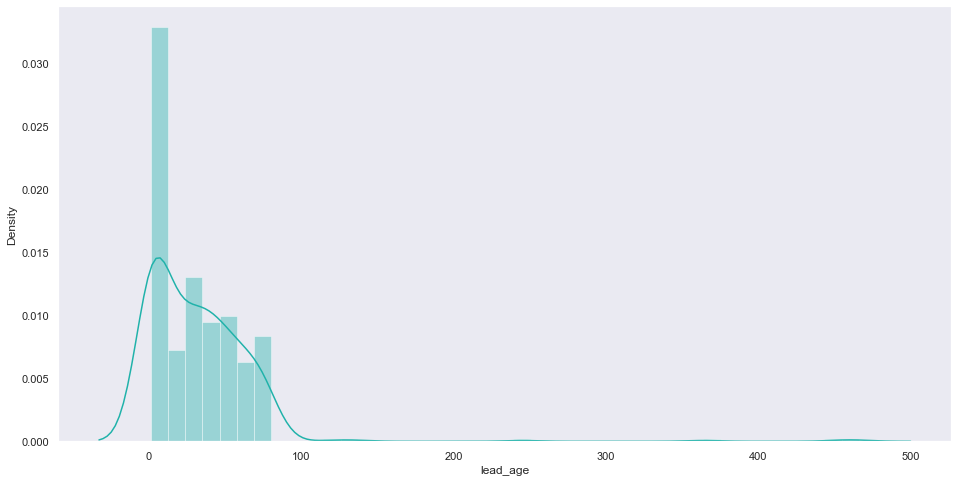

In [19]:
plt.figure(figsize=(16,8))
sns.set(style="dark")
sns.distplot(df['lead_age'], color='lightseagreen')
plt.show()

### Takeaways:
- There seem to be a lot of outliers skewing this feature
- I should remove some outliers by running a Interquartile Range (IQR
- On average leads take ~32 seconds to to CIC from the time of submission.
- I wonder if there is a correlation between lead_age and provider or lead_age and lead_cost
___

### lead_duration

In [20]:
df.lead_duration.value_counts()

86      4
105     4
77      4
21      4
85      3
       ..
680     1
1171    1
682     1
683     1
0       1
Name: lead_duration, Length: 438, dtype: int64

In [21]:
df.lead_duration.mean()

826.1821428571428

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


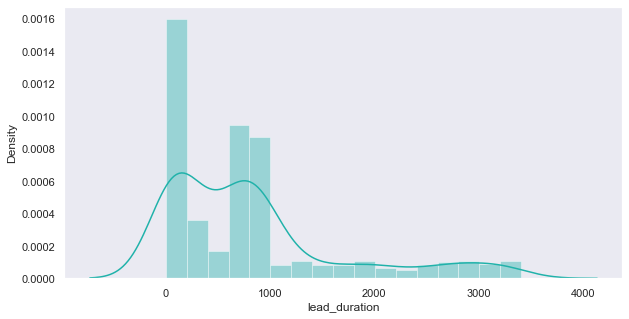

In [22]:
plt.figure(figsize=(10,5))
sns.set(style="dark")
sns.distplot(df['lead_duration'], color='lightseagreen')
plt.show()

### Takeaways:
- the average time a consumer took to fill out submission form was 826 seconds
- a lot of consumers exit out immediately
___

### field_count

In [23]:
df.field_count.value_counts()

3     32
21    30
17    30
9     30
1     27
4     27
5     27
10    25
18    25
13    25
22    25
7     24
23    24
15    24
16    24
11    23
14    21
2     21
8     20
6     19
19    19
20    19
12    19
Name: field_count, dtype: int64

In [24]:
df.field_count.mean()

11.869642857142857

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


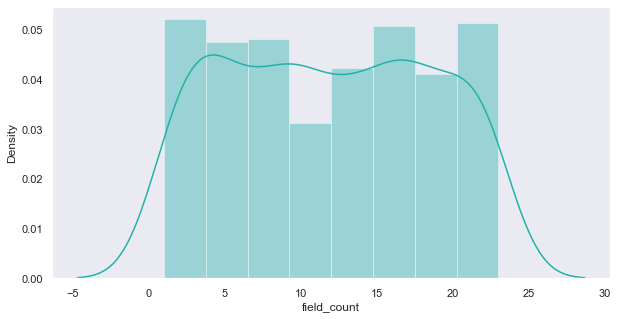

In [25]:
plt.figure(figsize=(10,5))
sns.set(style="dark")
sns.distplot(df['field_count'], color='lightseagreen')
plt.show()

### Takeaways:
- Seems fairly distributed
- on average a consumer had to fill out 12 fields on the submission form.
- I wondder if there is a correlation between the number of fields and the number of consumers logging out quickly.
___

### competitors

In [26]:
df.competitors.value_counts()

0    364
1     94
2     85
3     17
Name: competitors, dtype: int64

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


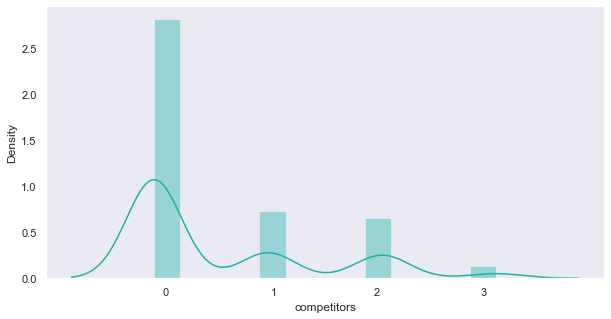

In [27]:
plt.figure(figsize=(10,5))
sns.set(style="dark")
sns.distplot(df['competitors'], color='lightseagreen')
plt.xticks([.1, 1.05, 1.957, 2.89], ['0', '1', '2', '3'])
plt.show()

### Takeaways
- Most of the time there are no other competitors
    - So why is it that there is only 6.77% of leads signing on with CIC?
- how many of the ones with one or more competitors are signing on with CIC?

___

## Planning the Prepare Step

1. Set `token` as the index
2. Handle outliers for following feature(s)
    - `lead_age`
3. make dummy variables for folowing feature(s)
    - `provider`

___

# Prepare

### Set index

In [28]:
# set index as toekn
df = df.set_index('token')

In [29]:
df.head()

,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors
token,,,,,,,,
1,C,50,0,0,74,962,10,2
2,C,50,0,0,47,617,9,3
3,A,75,0,0,7,94,14,1
4,C,75,0,0,29,104,15,1
5,D,75,0,0,27,82,9,1


### Handle Outliers

In [30]:
#find out what quanitle 1 is
q1 = df.lead_age.quantile(.25)
#find out what quanitle 3 is
q3 = df.lead_age.quantile(.75)
#find out what the IQR is
iqr = q3 - q1
# print the findings
print(f'q1 = :', q1) 
print(f'q3 = :', q3)
print(f'IQR = :', iqr)

q1 = : 3.0
q3 = : 50.0
IQR = : 47.0


In [31]:
# IQR has a parameter that is a 'multiplier'
multiplier = 1.5
# set upper_bound
upper_bound = q3 + (multiplier * iqr)
# set lower_bound
lower_bound = q1 - (multiplier * iqr)
# print findings
print(f'Upper Bound = :', upper_bound) 
print(f'Lower Bound = :', lower_bound) 
# since the lower bound is the negatives, it will have no affect

Upper Bound = : 120.5
Lower Bound = : -67.5


In [32]:
df.count()

provider         560
lead_cost        560
contact          560
purchase         560
lead_age         560
lead_duration    560
field_count      560
competitors      560
dtype: int64

In [33]:
# remove all lead_age over the upper_bound
df = df[df.lead_age < upper_bound]
# this drops 6 observations 560 to 554
df.head()

,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors
token,,,,,,,,
1,C,50,0,0,74,962,10,2
2,C,50,0,0,47,617,9,3
3,A,75,0,0,7,94,14,1
4,C,75,0,0,29,104,15,1
5,D,75,0,0,27,82,9,1


In [34]:
df.count()

provider         554
lead_cost        554
contact          554
purchase         554
lead_age         554
lead_duration    554
field_count      554
competitors      554
dtype: int64

- Removing the higher outliers dropped 6 of the 560 data points

In [35]:
# remove all lead_age over the upper_bound
df = df[df.lead_age > lower_bound]
# this drops 6 observations 560 to 554
df.head()

,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors
token,,,,,,,,
1,C,50,0,0,74,962,10,2
2,C,50,0,0,47,617,9,3
3,A,75,0,0,7,94,14,1
4,C,75,0,0,29,104,15,1
5,D,75,0,0,27,82,9,1


In [36]:
df.count()

provider         554
lead_cost        554
contact          554
purchase         554
lead_age         554
lead_duration    554
field_count      554
competitors      554
dtype: int64

- Removing the lower outliers made no change. No reason to do this.

___
### Make the Dummy Variables

In [37]:
df.provider.value_counts()

C    231
B    123
D    109
A     91
Name: provider, dtype: int64

In [38]:
# dummy provider feature
dummy_df =  pd.get_dummies(df['provider'])
# name the new columns (goes in order of value counts high to low)
dummy_df.columns = ['Provider_C', 'Provider_B', 
                    'Provider_D', 'Provider_A']
# concat the dummies to the main data frame
df = pd.concat([df, dummy_df], axis=1)
# 1 means yes 0 means no

In [39]:
df.head()

,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors,Provider_C,Provider_B,Provider_D,Provider_A
token,,,,,,,,,,,,
1,C,50,0,0,74,962,10,2,0,0,1,0
2,C,50,0,0,47,617,9,3,0,0,1,0
3,A,75,0,0,7,94,14,1,1,0,0,0
4,C,75,0,0,29,104,15,1,0,0,1,0
5,D,75,0,0,27,82,9,1,0,0,0,1


___
## Make a Function for Each Step of Prepare

### Indexing

In [40]:
df = pd.read_csv('client_leads_with_outcomes.csv')

In [41]:
def set_index(df):
    '''takes in df and sets the index'''
    # set index as toekn
    df = df.set_index('token')
    # return the df
    return df

df = set_index(df)

In [42]:
df.head()

,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors
token,,,,,,,,
1,C,50,0,0,74,962,10,2
2,C,50,0,0,47,617,9,3
3,A,75,0,0,7,94,14,1
4,C,75,0,0,29,104,15,1
5,D,75,0,0,27,82,9,1


### Outliers

In [43]:
def handle_outliers(df):
    '''takes in df and uses the IQR rule to remove outliers from lead_age'''
    #find out what quanitle 1 is
    q1 = df.lead_age.quantile(.25)
    #find out what quanitle 3 is
    q3 = df.lead_age.quantile(.75)
    #find out what the IQR is
    iqr = q3 - q1
    # IQR has a parameter that is a 'multiplier'
    multiplier = 1.5
    # set upper_bound
    upper_bound = q3 + (multiplier * iqr)
    # set lower_bound
    lower_bound = q1 - (multiplier * iqr)
    # remove all lead_age over the upper_bound
    df = df[df.lead_age < upper_bound]
    # this drops 6 observations 560 to 554
    return df

df = handle_outliers(df)

In [44]:
df.head()

,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors
token,,,,,,,,
1,C,50,0,0,74,962,10,2
2,C,50,0,0,47,617,9,3
3,A,75,0,0,7,94,14,1
4,C,75,0,0,29,104,15,1
5,D,75,0,0,27,82,9,1


### Dummy

In [45]:
def dummy_provider(df):
    '''makes dummy features from the provider feature
    1 stands for yes and 0 stands for no'''
    # dummy provider feature
    dummy_df =  pd.get_dummies(df['provider'])
    # name the new columns (goes in order of value counts high to low)
    dummy_df.columns = ['provider_a', 'provider_b', 
                        'provider_c', 'provider_d']
    # concat the dummies to the main data frame
    df = pd.concat([df, dummy_df], axis=1)
    # return df
    return df

df = dummy_provider(df)

In [46]:
df.head()

,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors,provider_a,provider_b,provider_c,provider_d
token,,,,,,,,,,,,
1,C,50,0,0,74,962,10,2,0,0,1,0
2,C,50,0,0,47,617,9,3,0,0,1,0
3,A,75,0,0,7,94,14,1,1,0,0,0
4,C,75,0,0,29,104,15,1,0,0,1,0
5,D,75,0,0,27,82,9,1,0,0,0,1


### All together

In [47]:
df = pd.read_csv('client_leads_with_outcomes.csv')

In [48]:
def clean_df(df):
    '''takes in df and applys funcitons set_index, handle_outliers, and dummy_provider
    converts the now cleaned dataframe into a csv'''
    # set the index
    df = set_index(df)
    # handle the outliers
    df = handle_outliers(df)
    # create dummy features from provider
    df = dummy_provider(df)
    # convert to df
    df.to_csv('clean_CIC.csv')

In [49]:
clean_df(df)

In [50]:
df = pd.read_csv('clean_CIC.csv')

In [51]:
df.head()

,token,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors,provider_a,provider_b,provider_c,provider_d
0,1,C,50,0,0,74,962,10,2,0,0,1,0
1,2,C,50,0,0,47,617,9,3,0,0,1,0
2,3,A,75,0,0,7,94,14,1,1,0,0,0
3,4,C,75,0,0,29,104,15,1,0,0,1,0
4,5,D,75,0,0,27,82,9,1,0,0,0,1


## Split the Data

In [52]:
# split the data into train, test and validate
train_validate, test = train_test_split(df, test_size=.2, random_state=1234)
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=1234)

In [59]:
train

,token,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors,provider_a,provider_b,provider_c,provider_d
160,161,D,25,0,0,52,606,10,0,0,0,0,1
267,270,C,25,0,0,9,3093,1,0,0,0,1,0
123,124,A,100,0,0,38,92,21,0,1,0,0,0
469,474,C,50,0,0,6,920,8,0,0,0,1,0
533,539,D,50,0,0,78,2570,18,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,D,75,0,0,47,95,13,1,0,0,0,1
339,343,A,25,0,0,1,1776,17,0,1,0,0,0
75,76,B,25,0,0,6,2971,15,0,0,1,0,0
419,423,C,50,0,0,73,906,23,0,0,0,1,0


In [60]:
test

,token,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors,provider_a,provider_b,provider_c,provider_d
59,60,C,50,0,0,48,941,20,0,0,0,1,0
392,396,C,25,0,0,18,1992,21,0,0,0,1,0
347,351,C,50,0,0,54,934,15,0,0,0,1,0
323,327,D,50,0,0,42,630,11,0,0,0,0,1
285,289,B,25,0,0,1,1949,14,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,439,A,100,0,0,11,25,18,0,1,0,0,0
433,437,A,25,0,0,2,2630,20,0,1,0,0,0
327,331,C,50,0,0,25,630,10,2,0,0,1,0
64,65,A,25,0,0,37,3192,17,0,1,0,0,0


In [61]:
validate

,token,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors,provider_a,provider_b,provider_c,provider_d
473,478,D,50,0,0,30,3013,2,0,0,0,0,1
265,268,C,50,0,0,35,795,12,3,0,0,1,0
402,406,D,50,0,0,50,2570,19,0,0,0,0,1
387,391,C,50,0,0,27,792,1,0,0,0,1,0
482,488,C,50,0,0,76,963,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,201,C,75,0,0,55,111,18,1,0,0,1,0
12,13,C,25,0,0,37,1150,8,0,0,0,1,0
120,121,C,50,0,0,1,973,15,3,0,0,1,0
456,460,C,25,0,0,61,1502,3,0,0,0,1,0


In [53]:
df.provider.value_counts()

C    231
B    123
D    109
A     91
Name: provider, dtype: int64

In [55]:
df.provider_a.value_counts()
# provider a is actually D

0    463
1     91
Name: provider_a, dtype: int64

In [56]:
df.provider_b.value_counts()
# provider b is actually c

0    431
1    123
Name: provider_b, dtype: int64

In [57]:
df.provider_c.value_counts()
# provider c is actually a

0    323
1    231
Name: provider_c, dtype: int64

In [58]:
df.provider_d.value_counts()
# provider d is actually c

0    445
1    109
Name: provider_d, dtype: int64